In [104]:
linkWorldMap="https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"


import geopandas as gpd
from  fiona import listlayers
listlayers(linkWorldMap)

['countries', 'rivers', 'cities', 'indicators']

In [105]:
countries=gpd.read_file(linkWorldMap,layer='countries')
rivers=gpd.read_file(linkWorldMap,layer='rivers')
cities=gpd.read_file(linkWorldMap,layer='cities')
indicators=gpd.read_file(linkWorldMap,layer='indicators')

In [106]:
countries.cx[:50,:50]

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
5,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472..."
...,...,...
245,Zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."
246,Zimbabwe,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325..."
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


<Axes: >

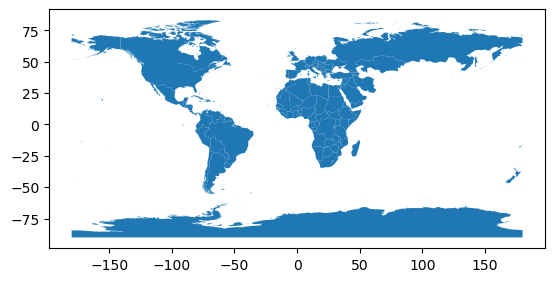

In [107]:
#then
countries.cx[:50,:50].plot()

In [108]:
iran =countries[countries.COUNTRY=='Iran']

In [109]:
citiesIran_clipped = gpd.clip(gdf=cities,
                          mask=iran)
riversIran_clipped = gpd.clip(gdf=rivers,
                               mask=iran)

<Axes: >

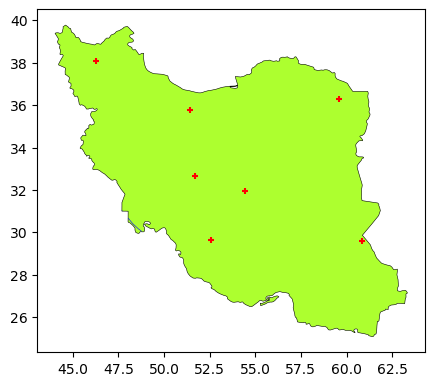

In [110]:
base = iran.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesIran_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversIran_clipped.plot(edgecolor='blue', linewidth=0.4,
                    ax=base)

In [111]:
iran.to_crs(3307).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [112]:
# now this works with no warning
iran.to_crs(3307).centroid

106    POINT (828250.963 3601977.278)
dtype: geometry

<Axes: >

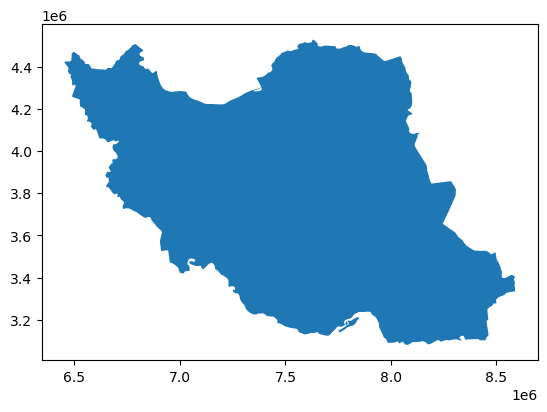

In [115]:
# replotting:

base3307=iran.to_crs(3387).plot()
iran.to_crs(3387).centroid.plot(color='red',ax=base3387)

In [118]:
iran_3387=iran.to_crs(3387)
cities_iran_3387=citiesIran_clipped.to_crs(iran_3387.crs)
rivers_iran_3387=riversIran_clipped.to_crs(iran_3387.crs)

In [119]:
## saving


import os

iran_3387.to_file(os.path.join("maps","iranMaps_3387.gpkg"), layer='country', driver="GPKG")
cities_iran_3387.to_file(os.path.join("maps","iranMaps_3387.gpkg"), layer='cities', driver="GPKG")
rivers_iran_3387.to_file(os.path.join("maps","iranMaps_3387.gpkg"), layer='rivers', driver="GPKG")
iran_3387.centroid.to_file(os.path.join("maps","iranMaps_3387.gpkg"), layer='centroid', driver="GPKG")

In [121]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","ir-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,5166,OIIE,large_airport,Imam Khomeini International Airport,35.416100,51.152199,3305.0,AS,Iran,IR,...,Tehran,1,OIIE,IKA,NaN,http://www.ikia.ir/,https://en.wikipedia.org/wiki/Imam_Khomeini_In...,Ahmadabad,1200,2008-06-13T14:30:04+00:00
1,5168,OIII,large_airport,Mehrabad International Airport,35.689201,51.313400,3962.0,AS,Iran,IR,...,Tehran,1,OIII,THR,NaN,NaN,https://en.wikipedia.org/wiki/Mehrabad_Interna...,NaN,1200,2008-06-13T14:30:04+00:00
2,5197,OISS,large_airport,Shiraz Shahid Dastghaib International Airport,29.539200,52.589802,4927.0,AS,Iran,IR,...,Shiraz,1,OISS,SYZ,NaN,http://shirazairport.ir/,https://en.wikipedia.org/wiki/Shiraz_Internati...,NaN,1200,2022-11-20T21:49:09+00:00
3,5183,OIMM,large_airport,Mashhad International Airport,36.235199,59.640999,3263.0,AS,Iran,IR,...,Mashhad,1,OIMM,MHD,NaN,NaN,https://en.wikipedia.org/wiki/Mashhad_Internat...,Shahid Hashemi Nejad Airport,1200,2009-03-25T08:12:12+00:00
283,505009,IR-0145,closed,Former Yasuj Airport,30.642780,51.588910,5830.0,AS,Iran,IR,...,Yasuj,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-11-20T21:16:18+00:00
284,351877,IR-0079,heliport,Shohadaye Kargar Hospital Heliport,31.867730,54.397860,4029.0,AS,Iran,IR,...,Yazd,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-24T15:12:48+00:00
285,505026,IR-0159,heliport,Zafarghand Compressor Station Heliport,33.201620,52.459510,5666.0,AS,Iran,IR,...,Zafarghand,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-11-20T23:47:11+00:00
286,351873,IR-0075,heliport,Imam Ali Hospital Heliport,30.808950,56.545020,5407.0,AS,Iran,IR,...,Zarand,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-11-20T22:47:21+00:00


In [122]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           287 non-null    object 
 1   type           287 non-null    object 
 2   latitude_deg   287 non-null    float64
 3   longitude_deg  287 non-null    float64
 4   elevation_ft   213 non-null    float64
 5   region_name    287 non-null    object 
 6   municipality   271 non-null    object 
dtypes: float64(3), object(4)
memory usage: 15.8+ KB


In [123]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

<Axes: >

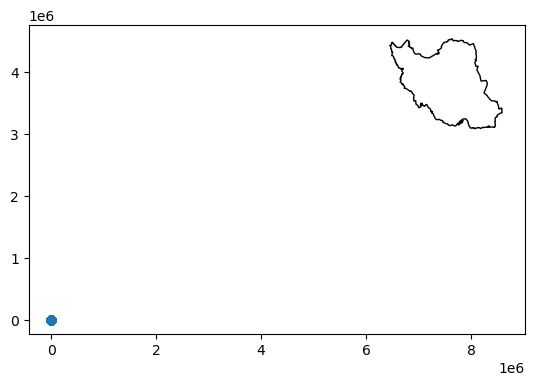

In [124]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=iran.crs.to_epsg())# the coordinates were in degrees - unprojected

# let's plot

base = iran_3387.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [127]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

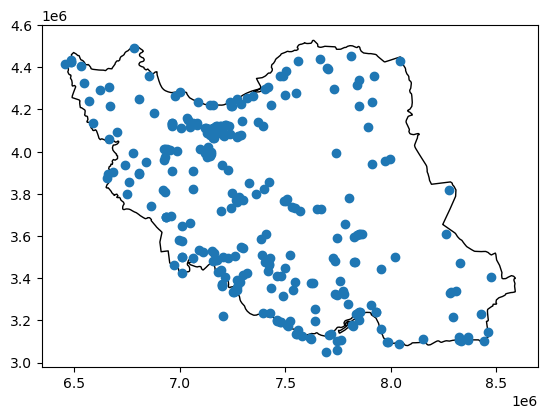

In [128]:
airports_3387=airports.to_crs(3387)

## then

base = iran_3387.plot(color='white', edgecolor='black')
airports_3387.plot(ax=base)

In [129]:
airports_3387['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     111
heliport           89
medium_airport     60
closed             22
large_airport       4
seaplane_base       1
Name: count, dtype: int64

In [130]:
airports_3387.rename(columns={'type':'kind'},inplace=True)

## adding the airports to GPKG
airports_3387.to_file(os.path.join("maps","iranMaps_3387.gpkg"), layer='airports', driver="GPKG")

In [131]:
iran_3387

,COUNTRY,geometry
106,Iran,"MULTIPOLYGON (((8171919.559 3902690.657, 81751..."


In [132]:
iran_3387.boundary

106    MULTILINESTRING ((8171919.559 3902690.657, 817...
dtype: geometry

<Axes: >

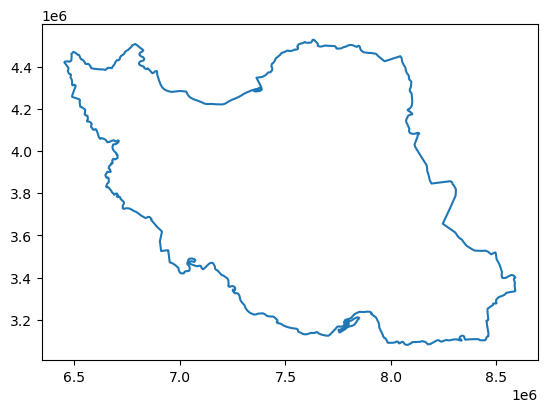

In [133]:
# This is just the borderline
iran_3387.boundary.plot()

In [134]:
# does 'boundary' return a GDF?
type(iran_3387.boundary)

geopandas.geoseries.GeoSeries

In [135]:
# converting into GDF
iran_3387.boundary.to_frame()

,0
106,"MULTILINESTRING ((8171919.559 3902690.657, 817..."


In [136]:
# conversion
iran_border=iran_3387.boundary.to_frame()

# new column (optional)
iran_border['name']='Iran'

# renaming the geometry column
iran_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
iran_border = iran_border.set_geometry("geometry")

# verifying:
iran_border.crs

<Projected CRS: EPSG:3387>
Name: KKJ / Finland zone 5
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Finland - east of 31°30'E.
- bounds: (31.5, 62.83, 31.59, 63.0)
Coordinate Operation:
- name: Finland zone 5
- method: Transverse Mercator
Datum: Kartastokoordinaattijarjestelma (1966)
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [138]:
iran_states=gpd.read_file(os.path.join("maps","irn_adminsshp","irn_admbndp_admALL_unhcr_itos_20190514.shp"))
iran_municipalities=gpd.read_file(os.path.join("maps","irn_adminsshp","irn_admbndp_admALL_unhcr_itos_20190514.shp"))

In [139]:
type(iran_states), type(iran_municipalities)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [140]:
iran_states.geometry.head()

0    POINT (59.76097 35.73650)
1    POINT (48.57034 33.39178)
2    POINT (58.17128 37.20050)
3    POINT (58.24279 33.36358)
4    POINT (61.40353 26.45421)
Name: geometry, dtype: geometry

In [141]:
iran_municipalities.geometry.head()

0    POINT (59.76097 35.73650)
1    POINT (48.57034 33.39178)
2    POINT (58.17128 37.20050)
3    POINT (58.24279 33.36358)
4    POINT (61.40353 26.45421)
Name: geometry, dtype: geometry

<Axes: >

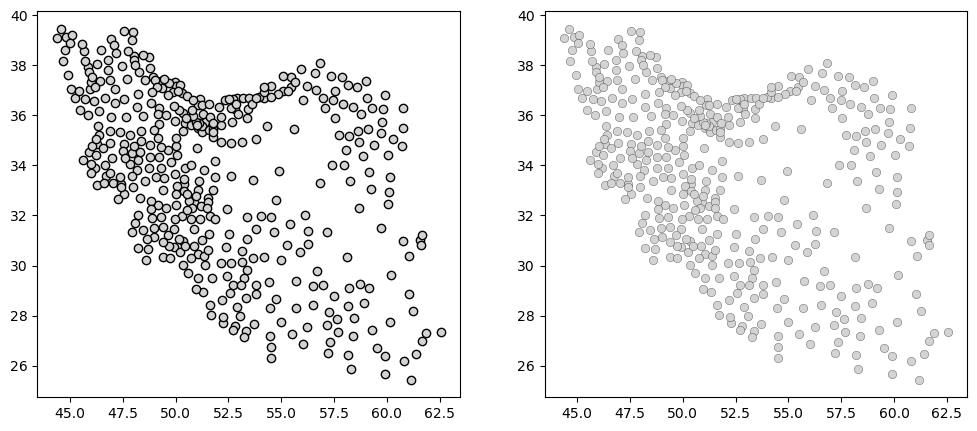

In [142]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

iran_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
iran_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [143]:
iran_states.to_crs(3387)

,ADM0_EN,ADM0_FA,ADM0_PCODE,ADM1_EN,ADM1_FA,ADM1_PCODE,ADM2_EN,ADM2_FA,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1FA,ADM2ALT2FA,geometry
0,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,Razavi Khorasan,خراسان رضوی,IR024,Fariman,شهرستان فریمان,IR024008,None,None,None,None,None,POINT (7947314.980 4305068.719)
1,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,Lorestan,لرستان,IR018,Khorramabad,شهرستان خرم‌آباد,IR018007,None,None,None,None,None,POINT (6955768.831 3806786.929)
2,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,North Khorasan,خراسان شمالی,IR021,Faroj,شهرستان فاروج,IR021003,None,None,None,None,None,POINT (7752752.137 4429483.695)
3,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,South Khorasan,خراسان جنوبی,IR027,Sarayan,شهرستان سرایان,IR027008,None,None,None,None,None,POINT (7878625.358 3993094.968)
4,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,Sistan and Baluchestan,سیستان و بلوچستان,IR026,Sarbaz,شهرستان سرباز,IR026015,None,None,None,None,None,POINT (8403614.182 3266350.383)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,Tehran,تهران,IR028,Pishva,شهرستان پیشوا,IR028009,None,None,None,None,None,POINT (7214989.041 4076297.341)
425,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,Alborz,البرز‎,IR001,Nazarabad,شهرستان نظرآباد,IR001004,None,None,None,None,None,POINT (7089184.788 4119272.106)
426,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,Fars,فارس,IR006,Neyriz,شهرستان نی ریز,IR006022,None,None,None,None,None,POINT (7606737.922 3445770.842)
427,Iran (Islamic Republic of),ایران (جمهوری اسلامی),IR,Mazandaran,مازندران,IR020,Noshahr,شهرستان نوشهر,IR020015,None,None,None,None,None,POINT (7176773.998 4198965.992)


In [144]:
# set as unprojected
iran_states.crs = "EPSG:3387"
iran_municipalities.crs = "EPSG:3387"

In [145]:
iran_states=iran_states.to_crs(3387)
iran_municipalities=iran_municipalities.to_crs(3387)